In [20]:
using PyPlot, SeisPlot, SeisReconstruction, SeisProcessing, SeisMain

# Test Minimun Weighted Norm Interpolation (MWNI)

# Bin Liu and M D Sacchi, 2004, Minimum weighted norm interpolation of seismic records
# GEOPHYSICS 2004 69:6, 1560-1568.



In [21]:
# Create a cube with events with parabolic moveout. The cube is 3D 
# SeisMWNI can handel 2D,3D,4D and 5D data cubes.

d = SeisParabEvents(dt=0.004,nt=120,nx1=40,nx2=44, 
                    p1 = [ 0.2, 0.0, -0.1],
                    p2 = [-0.3, 0.0, -0.3],
                    tau = [0.1, 0.3,  0.4],xref=1000,dx1=15,dx2=10); 

# Keep fully sampled cube 

dtrue = copy(d)

# Randomly decimate, perc=50 means that 50% of the bins are empty

dec = SeisDecimate(d;perc=50);

In [22]:
# Reconstruct the cube

dmwni = SeisMWNI(dec;dt=0.004,fmax=80,padt=2,padx=2,Niter_internal=10,Niter_external=3,mu=0.00001);

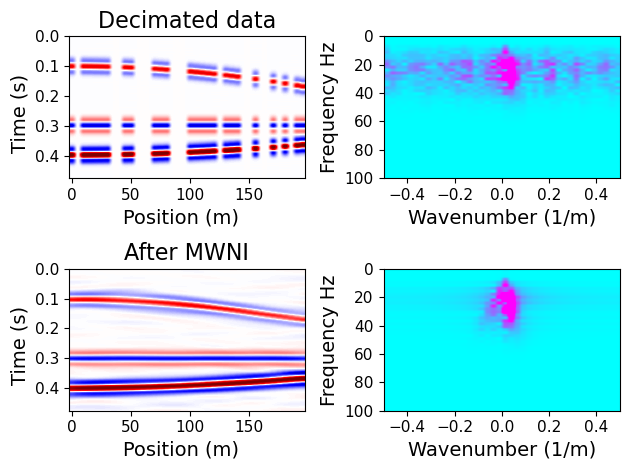

In [23]:
figure(1)

subplot(221)
SeisPlotTX(dec[:,:,1],cmap="seismic",fignum=1,pclip=99,title="Decimated data",dy=0.004,ylabel="Time (s)", dx=5, xlabel="Position (m)")
subplot(222)
SeisPlotFK(dec[:,:,1], cmap="cool", dy=0.004,hbox=5,pclip=99,fignum=1)

subplot(223)
SeisPlotTX(dmwni[:,:,1,1,1],cmap="seismic",fignum=1,pclip=99,title="After MWNI",dy=0.004,ylabel="Time (s)", dx=5, xlabel="Position (m)")
subplot(224)
SeisPlotFK(dmwni[:,:,1,1,1],cmap="cool",dy=0.004,fignum=1,pclip=99)
tight_layout()
gcf()

In [29]:
SNR_db=MeasureSNR(dtrue,dropdims(dmwni,dims=(4,5)),db=true)

println("SNR of of reconstructions is: ",floor(SNR_db), " dB")

SNR of of reconstructions is: 20.0 dB
